# Assignment 1: Uninformed Search

*Lucas Wilson*

# Building The Tree Search Function
## Helper functions for Tree Search <a id='helpers'></a>

In [1]:
def removeVisitedNodes(children, expanded, unExpanded):
    """ Given a list of children, the expanded dictionary, and the unExpanded
    list of child-parent tuples, return a list of children not in expanded or
    unExpanded.

    Args:
        children(list):
        expanded(dict):
        unExpanded(list(tuple)):
    """
    if len(children) == 0:
        return children
    visited = set(expanded.keys())
    for e in unExpanded:
        visited.add(e[0])
    return list(filter(lambda child: child not in visited, children))

This method is given three arguments and returns successor nodes filtered by already visited nodes.

### The Arguments

* `children` - the list of successors of the current state (from successorsf)
* `expanded` - the dictionary of already expanded nodes
* `unExpanded` - the list of two dimensional tuples (child, parent)

### The Outline

1. If `children` is empty, there is no filtering to be done.
1. Next, we build the `visited` set of visited nodes. It is initialized with the nodes from `expanded`. A set is used since `insert` and `is element of` methods are $O(log(n))$.
1. Add children contained in `unExpanded` to the `visited` set.
1. Finally, any elements in `children` also in the newly built `visited` set are removed using `newList = list(filter(filterFunction, oldList))` which will create a new list of the elements from `oldList` such that when passed to `filterFunction`, it returns true. In other words, $newList = \{e \in oldList : filterFunction(e)\}$ where $newList$ is an ordered set represented by a `list` in python.
1. The resultant list is returned.

## Graph Search Method

In [2]:
def treeSearch(startState, goalState, successorsf, breadthFirst):
    """Solves the problem by finding a path from startState to goalState with
    edges defined by successorsf. Will use breadth first or depth first
    depending on specification.

    Args:
        startState(object): initial state (can be any type)
        goalState(object): goal state (should have same type as startState)
        successorsf(function): action function
        breadthFirst(bool): breadth vs depth first toggle
    """
    expanded = {}
    unExpanded = [(startState, None)] # queue with end as top

    # trivial case
    if startState == goalState:
        return [startState]

    while unExpanded:
        state, parent = unExpanded.pop()
        children = successorsf(state)
        expanded[state] = parent
        children = removeVisitedNodes(children, expanded, unExpanded)
        if goalState in children:
            # this is backwards so I can push instead of shift an array
            # I guess I could use timeit to see if it's faster..
            solution = [goalState, state]
            while parent:
                solution.append(parent) # push
                parent = expanded[parent]
            solution.reverse()
            return solution
        children.sort()
        children.reverse()
        children = [(e, state) for e in children]
        if breadthFirst: # breadth first enqueues to bottom
            unExpanded = children + unExpanded
        else: # depth first pushes to top
            unExpanded = unExpanded + children

    # post: tree has been traversed, but no solution has been found.
    return "Goal not found"

### The Function Declaration
```python
def treeSearch(startState, goalState, successorsf, breadthFirst):
```

The function declaration. This method solves graph search problems where `startState` is the initial node, `goalState` is the goal node, and `successorsf` is a function to define paths between nodes. `breadthFirst` will specify which tree traversal method to use, breadth first or depth first.

The method is supposed to be a tree search algorithm, but since it keeps track of visited nodes and detects cycles, it is therefore a graph search method.

#### The Arguments

* `startState` - The initial state of the problem
* `goalState` - The goal state of the problem
* `successorsf` - The definition of successors to define the graph.
* `breadthFirst` - What type of tree search to use, breadth first or depth first.

### Initialization
```python
    expanded = {}
    unExpanded = [(startState, None)] # queue with end as top
```

The difference between breadth first and depth first lies within how the queue `unExpanded` is used. It is a queue so therefore has methods to push, pop, peek, and check if it's empty. pop, peek and isEmpty all function the same between breadth-first and depth-first, but push will function differently.

In breadth first search, new nodes are pushed to the back of the queue. In depth first search, new nodes are pushed to the end of the queue. 

* $[bottom, ..., top]$ before $new$ is added
* $[{\bf new}, bottom, ..., top]$ is breadth-first
* $[bottom, ..., top, {\bf new}]$ is depth-first

### The Trivial Case
```python
    if startState == goalState:
        return [startState]
```

Handling this trivial case saves computation time and allows us to assume that the goal will be one of the descendants as opposed to the currently selected node. With that assumption, we can create the following. 

### The While Loop Traversal
```python
    while unExpanded:
```
Here, we are checking if the queue is empty. While the queue is not empty, there are still nodes to explore in the search for the goal. If the queue is empty, then the goal was not found and all descendants have been traversed. See [below](#goal_not_found).

```python
        state, parent = unExpanded.pop()
```
This allows us to explore the current node. The top of the queue is the end, so pop is the correct method here.

```python
        children = successorsf(state)
        expanded[state] = parent
        children = removeVisitedNodes(children, expanded, unExpanded)
```
First, we use the `successorsf` function to identify successors of the current state. Next, we record the child-parent relationship, so the solution path can be rebuilt later. We store these relationships in `expanded`. Finally, we remove all visited nodes using `removeVisitedNodes` defined [here](#helpers) from the successors so that we can avoid cycles. This specification makes this tree search algorithm a graph search algorithm.

```python
        if goalState in children:
```
In this part of the code, we are handling the case where the goal state shows up in one of the descendants. We initialize the solution

```python
            solution = [goalState, state]
            while parent:
                solution.append(parent) # push
                parent = expanded[parent]
            solution.reverse()
            return solution
```
We initialize `solution` as a list containing the goalState followed by the state. Notice that the solution is backwards: since we plan to trace the tree backwards using `expanded` appending nodes as we go, we are going to append to `solution`. Appending to an array is faster than adding it to the beginning. Finally, we reverse the solution path and return it.

```python
        children.sort()
        children.reverse()
        children = [(e, state) for e in children]
```
This is specification of the assignment to standardize the path traversal. We sort the children, reverse them, and then refactor them then as tuple pairs of `(child, parent)` in a list.

```python
        if breadthFirst: # breadth first enqueues to bottom
            unExpanded = children + unExpanded
        else: # depth first pushes to top
            unExpanded = unExpanded + children
```
Once `children` is formatted, we can insert the children into the queue. As stated above, this is where the difference between breadth-first and depth-first search lies:
* Breadth-first search uses a fifo queue where new elements, i.e. `children`, are added to the end of the queue (in `unExpanded`'s case, the front of the list).
* Depth-first search uses a filo queue where new elements, i.e. `children`, are added to the top of the queue (in `unExpanded`'s case, the end of the list).

### Goal Not Found<a id='goal_not_found'></a>
```python
    return "Goal not found"
```
If unExpanded is empty, then all descendants have been traversed yet the goal hasn't been found. Thus, no solution can be found, so we return `"Goal not found"` instead of a list containing the solution path.

## Depth and Breadth First Tree Search Variation

In [3]:
def breadthFirstSearch(startState, goalState, successorsf):
    return treeSearch(startState, goalState, successorsf, True)

def depthFirstSearch(startState, goalState, successorsf):
    return treeSearch(startState, goalState, successorsf, False)

Simply uses the tree search specifying whether it is breadth-first or depth-first.

## Tree Demonstration

Here is a simple example.  States are defined by lower case letters.  A dictionary stores a list of successor states for each state in the graph that has successors.

In [4]:
successors = {'a':  ['b', 'c', 'd'],
              'b':  ['e', 'f', 'g'],
              'c':  ['a', 'h', 'i'],
              'd':  ['j', 'z'],
              'e':  ['k', 'l'],
              'g':  ['m'],
              'k':  ['z']}
successors

{'a': ['b', 'c', 'd'],
 'b': ['e', 'f', 'g'],
 'c': ['a', 'h', 'i'],
 'd': ['j', 'z'],
 'e': ['k', 'l'],
 'g': ['m'],
 'k': ['z']}

In [5]:
import copy

def successorsf(state):
    return copy.copy(successors.get(state, []))

In [6]:
successorsf('e')

['k', 'l']

In [7]:
print('Breadth-first')
print('path from a to a is', breadthFirstSearch('a', 'a', successorsf))
print('path from a to m is', breadthFirstSearch('a', 'm', successorsf))
print('path from a to z is', breadthFirstSearch('a', 'z', successorsf))

Breadth-first
path from a to a is ['a']
path from a to m is ['a', 'b', 'g', 'm']
path from a to z is ['a', 'd', 'z']


In [8]:
print('Depth-first')
print('path from a to a is', depthFirstSearch('a', 'a', successorsf))
print('path from a to m is', depthFirstSearch('a', 'm', successorsf))
print('path from a to z is', depthFirstSearch('a', 'z', successorsf))

Depth-first
path from a to a is ['a']
path from a to m is ['a', 'b', 'g', 'm']
path from a to z is ['a', 'b', 'e', 'k', 'z']


Let's try a navigation problem around a grid of size 10 x 10. Rows and columns will be indexed from 0 to 9.

The following function takes the input state and returns all possible states.

## Graph-Grid Demonstration

In [9]:
def gridSuccessors(state):
    row, col = state
    # succs will be list of tuples () rather than list of lists [] because state must
    # be an immutable type to serve as a key in dictionary of expanded nodes
    succs = []
    for r in [-1, 0, 1]:   #check each row
        for c in [-1, 0, 1]:  # check in each col
            newr = row + r
            newc = col + c
            if 0 <= newr <= 9 and 0 <= newc <= 9:  
                succs.append( (newr, newc) )
    return succs

In [10]:
gridSuccessors([3,4])

[(2, 3), (2, 4), (2, 5), (3, 3), (3, 4), (3, 5), (4, 3), (4, 4), (4, 5)]

In [11]:
gridSuccessors([3,9])

[(2, 8), (2, 9), (3, 8), (3, 9), (4, 8), (4, 9)]

In [12]:
gridSuccessors([0,0])

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [13]:
print('Breadth-first')
print('path from (0, 0) to (9, 9) is', breadthFirstSearch((0, 0), (9, 9), gridSuccessors))

Breadth-first
path from (0, 0) to (9, 9) is [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)]


In [14]:
print('Depth-first')
print('path from (0, 0) to (9, 9) is', depthFirstSearch((0, 0), (9, 9), gridSuccessors))

Depth-first
path from (0, 0) to (9, 9) is [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 9), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (2, 1), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 1), (8, 2), (7, 2), (6, 2), (5, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (5, 9), (6, 8), (6, 7), (6, 6), (6, 5), (7, 4), (8, 4), (9, 5), (8, 6), (8, 7), (8, 8), (9, 9)]


Let's plot the paths.

In [15]:
path = depthFirstSearch((0, 0), (9, 9), gridSuccessors)
path

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (1, 9),
 (2, 8),
 (2, 7),
 (2, 6),
 (2, 5),
 (2, 4),
 (2, 3),
 (2, 2),
 (2, 1),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 1),
 (8, 2),
 (7, 2),
 (6, 2),
 (5, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (5, 9),
 (6, 8),
 (6, 7),
 (6, 6),
 (6, 5),
 (7, 4),
 (8, 4),
 (9, 5),
 (8, 6),
 (8, 7),
 (8, 8),
 (9, 9)]

Now, we have the path to goal state. To plot this path we must extract the first value in each tuple and put them in a list called `rows` to use as the $y$ coordinate of each point, and build a second list called `cols` of second values.

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

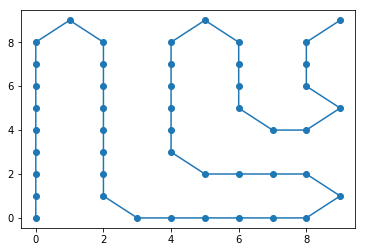

In [17]:
rows = [location[0] for location in path]
cols = [location[1] for location in path]
plt.plot(rows,cols,'o-');

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)]


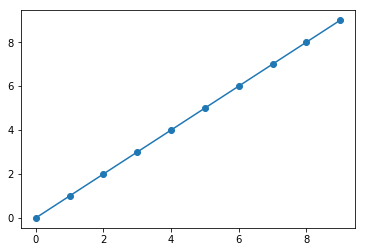

In [18]:
path = breadthFirstSearch((0, 0), (9, 9), gridSuccessors)
print(path)
rows = [location[0] for location in path]
cols = [location[1] for location in path]
plt.plot(rows,cols,'o-');

In [19]:
depthFirstSearch((0, 0), (9, 20), gridSuccessors)

'Goal not found'

# Camel Problem

## Helper functions

In [27]:
def moveCamel(state, camel, space):
    """swaps the camel index with the space index"""
    state = list(state)
    tmp = state[camel]
    state[camel] = state[space]
    state[space] = tmp
    return tuple(state)

This function is used by `camelSuccessorsf` and moves a camel into the open space.

In [21]:
def genCamelProb(n, R='R', S=' ', L='L'):
    """n is number of camels on each side"""
    ret = [L]*n + [S] + [R]*n
    rev = tuple(ret)
    ret.reverse()
    ret = tuple(ret)
    return ret, rev

This function can generate camel problems of size n. The normal problem is of size 4.

## Successors Function

In [22]:
def camelSuccessorsf(state, S=' ', L='L', R='R'):
    """
    Args:
        state(list): a list of 'R', ' ', and 'L'. 'R' is a camel that can only
                move right, 'L' is a camel that can only move left, ' ' is an
                open space.
        S(str): an alias for space, default ' '
        L(str): an alias for left moving camel, default 'L'
        R(str): an alias for right moving camel, default 'R'

    Assumptions:
    * "...camels never go backwards...." => R can't move left, and L can't move
    right
    * "...camels will climb over each other, but only if there is a camel sized
    space on the other side." => all camels within one or two squares from ' '
    are able to move to the space as long as it doesn't violate the previous
    rule.

    Note: the problem doesn't require the camel be an L camel for them to climb
    over. This allows an L jump over an L, which is equivalent to both moving
    sequentially. Although equivalent, it raises those states in depth within
    the search tree, so it could yield interesting results. Since it's
    different than what the example assumes, I'll add a toggle to enable this
    assumption.
    """
    space = state.index(S)
    children = []
    if space-2 >= 0 and state[space-2] == R:
        children.append(moveCamel(state, space-2, space))
    if space-1 >= 0 and state[space-1] == R:
        children.append(moveCamel(state, space-1, space))
    if space+1 < len(state) and state[space+1] == L:
        children.append(moveCamel(state, space+1, space))
    if space+2 < len(state) and state[space+2] == L:
        children.append(moveCamel(state, space+2, space))
    return children

## Demonstration
### Initialization

In [34]:
camelStartState, camelGoalState = genCamelProb(4)

'R' represents a camel moving right, 'L' represents a camel moving left, and ' ' represents the camel sized space. This is what the initial state looks like:

In [36]:
camelStartState

('R', 'R', 'R', 'R', ' ', 'L', 'L', 'L', 'L')

In [30]:
camelSuccessorsf(camelStartState)

[('R', 'R', ' ', 'R', 'R', 'L', 'L', 'L', 'L'),
 ('R', 'R', 'R', ' ', 'R', 'L', 'L', 'L', 'L'),
 ('R', 'R', 'R', 'R', 'L', ' ', 'L', 'L', 'L'),
 ('R', 'R', 'R', 'R', 'L', 'L', ' ', 'L', 'L')]

These are the successors of the initial state. Notice that there are four instead of two. The specification of the problem doesn't prevent a left-moving camel from climbing over another left-moving camel. This is equivalent to the left left-moving camel moving left followed by the right left-moving camel moving left, but it does this in a single move, which may change the solution space (it doesn't).

In [32]:
children = camelSuccessorsf(camelStartState)
print(children[0])
camelSuccessorsf(children[0])

('R', 'R', ' ', 'R', 'R', 'L', 'L', 'L', 'L')


[(' ', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L'),
 ('R', ' ', 'R', 'R', 'R', 'L', 'L', 'L', 'L')]

Going further, these are the successors of the first successor of the initial state. It shows the third camel from the left climbing over the fourth camel followed by either the left most camel climbing over the second left most or the second left most moving to the right.

The full solutions are listed below. Interestingly, breadth and depth first searches find the same solution. Further, my altered successor function didn't locate different solutions from the example.

In [33]:
bfs = breadthFirstSearch(camelStartState, camelGoalState, camelSuccessorsf)
print('Breadth-first solution: (', len(bfs), 'steps)')
for s in bfs:
    print(s)

dfs = depthFirstSearch(camelStartState, camelGoalState, camelSuccessorsf)
print('Depth-first solution: (', len(dfs), 'steps)')
for s in dfs:
    print(s)

Breadth-first solution: ( 25 steps)
('R', 'R', 'R', 'R', ' ', 'L', 'L', 'L', 'L')
('R', 'R', 'R', ' ', 'R', 'L', 'L', 'L', 'L')
('R', 'R', 'R', 'L', 'R', ' ', 'L', 'L', 'L')
('R', 'R', 'R', 'L', 'R', 'L', ' ', 'L', 'L')
('R', 'R', 'R', 'L', ' ', 'L', 'R', 'L', 'L')
('R', 'R', ' ', 'L', 'R', 'L', 'R', 'L', 'L')
('R', ' ', 'R', 'L', 'R', 'L', 'R', 'L', 'L')
('R', 'L', 'R', ' ', 'R', 'L', 'R', 'L', 'L')
('R', 'L', 'R', 'L', 'R', ' ', 'R', 'L', 'L')
('R', 'L', 'R', 'L', 'R', 'L', 'R', ' ', 'L')
('R', 'L', 'R', 'L', 'R', 'L', 'R', 'L', ' ')
('R', 'L', 'R', 'L', 'R', 'L', ' ', 'L', 'R')
('R', 'L', 'R', 'L', ' ', 'L', 'R', 'L', 'R')
('R', 'L', ' ', 'L', 'R', 'L', 'R', 'L', 'R')
(' ', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'R')
('L', ' ', 'R', 'L', 'R', 'L', 'R', 'L', 'R')
('L', 'L', 'R', ' ', 'R', 'L', 'R', 'L', 'R')
('L', 'L', 'R', 'L', 'R', ' ', 'R', 'L', 'R')
('L', 'L', 'R', 'L', 'R', 'L', 'R', ' ', 'R')
('L', 'L', 'R', 'L', 'R', 'L', ' ', 'R', 'R')
('L', 'L', 'R', 'L', ' ', 'L', 'R', 'R', 'R'